In [1]:
import pandas
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
def getRandomRangeList(x):
    return np.random.randint(0,len(x),(1,len(x)))

## Following are the path of the dataset
    TO STUDY ABOUT THE DATASET PLEASE VISIT FOLLOWING LINK
    
    FOR REALSTATE
    https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set
    
    FOR VIDEO CHARACTERISTIC :
    https://archive.ics.uci.edu/ml/datasets/Online+Video+Characteristics+and+Transcoding+Time+Dataset

In [5]:
ls 

datamanip.ipynb  realstate.xlsx   trans.tsv


In [6]:
transocdedata = 'trans.tsv'
realstate = 'realstate.xlsx'

## SECTION 1 TRANSCODE DATA

In [7]:
df = pd.read_csv(transocdedata, sep = '\t')
print(df.shape)
df.head()

(68784, 22)


,id,duration,codec,width,height,bitrate,framerate,i,p,b,...,p_size,b_size,size,o_codec,o_bitrate,o_framerate,o_width,o_height,umem,utime
0,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,176,144,22508,0.612
1,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,320,240,25164,0.980
2,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,480,360,29228,1.216
3,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,640,480,34316,1.692
4,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,1280,720,58528,3.456


In [8]:
# HERE WE DON'T NEED ID so we will drop ID
df.drop(columns=['id'], inplace = True)
print(df.shape)

# Lets Visit the datatypes of each feature
df.dtypes

(68784, 21)


duration       float64
codec           object
width            int64
height           int64
bitrate          int64
framerate      float64
i                int64
p                int64
b                int64
frames           int64
i_size           int64
p_size           int64
b_size           int64
size             int64
o_codec         object
o_bitrate        int64
o_framerate    float64
o_width          int64
o_height         int64
umem             int64
utime          float64
dtype: object

In [9]:
# here codec and o_codec are object type we need to convert this data into 
# some numeric for
# we do this by using onehot encoding
# but first lets visit codec and o_codec
# for that pd.dummies is an important function 

print('codec unique', df.codec.unique())
print('o_codec unique', df.o_codec.unique())

codec unique ['mpeg4' 'h264' 'vp8' 'flv']
o_codec unique ['mpeg4' 'vp8' 'flv' 'h264']


In [10]:
# Above Are Categorical variable, let's see if there are any other such small unique cases 
# in non categorical as well

for col in df.columns:
    print(col,len(df[col].unique()))

duration 1086
codec 4
width 6
height 6
bitrate 1095
framerate 261
i 306
p 1042
b 20
frames 1044
i_size 1099
p_size 1099
b_size 1
size 1099
o_codec 4
o_bitrate 7
o_framerate 5
o_width 6
o_height 6
umem 9395
utime 10960


In [11]:
#We saw b_size has only one value this can be more easily understood from the following plot

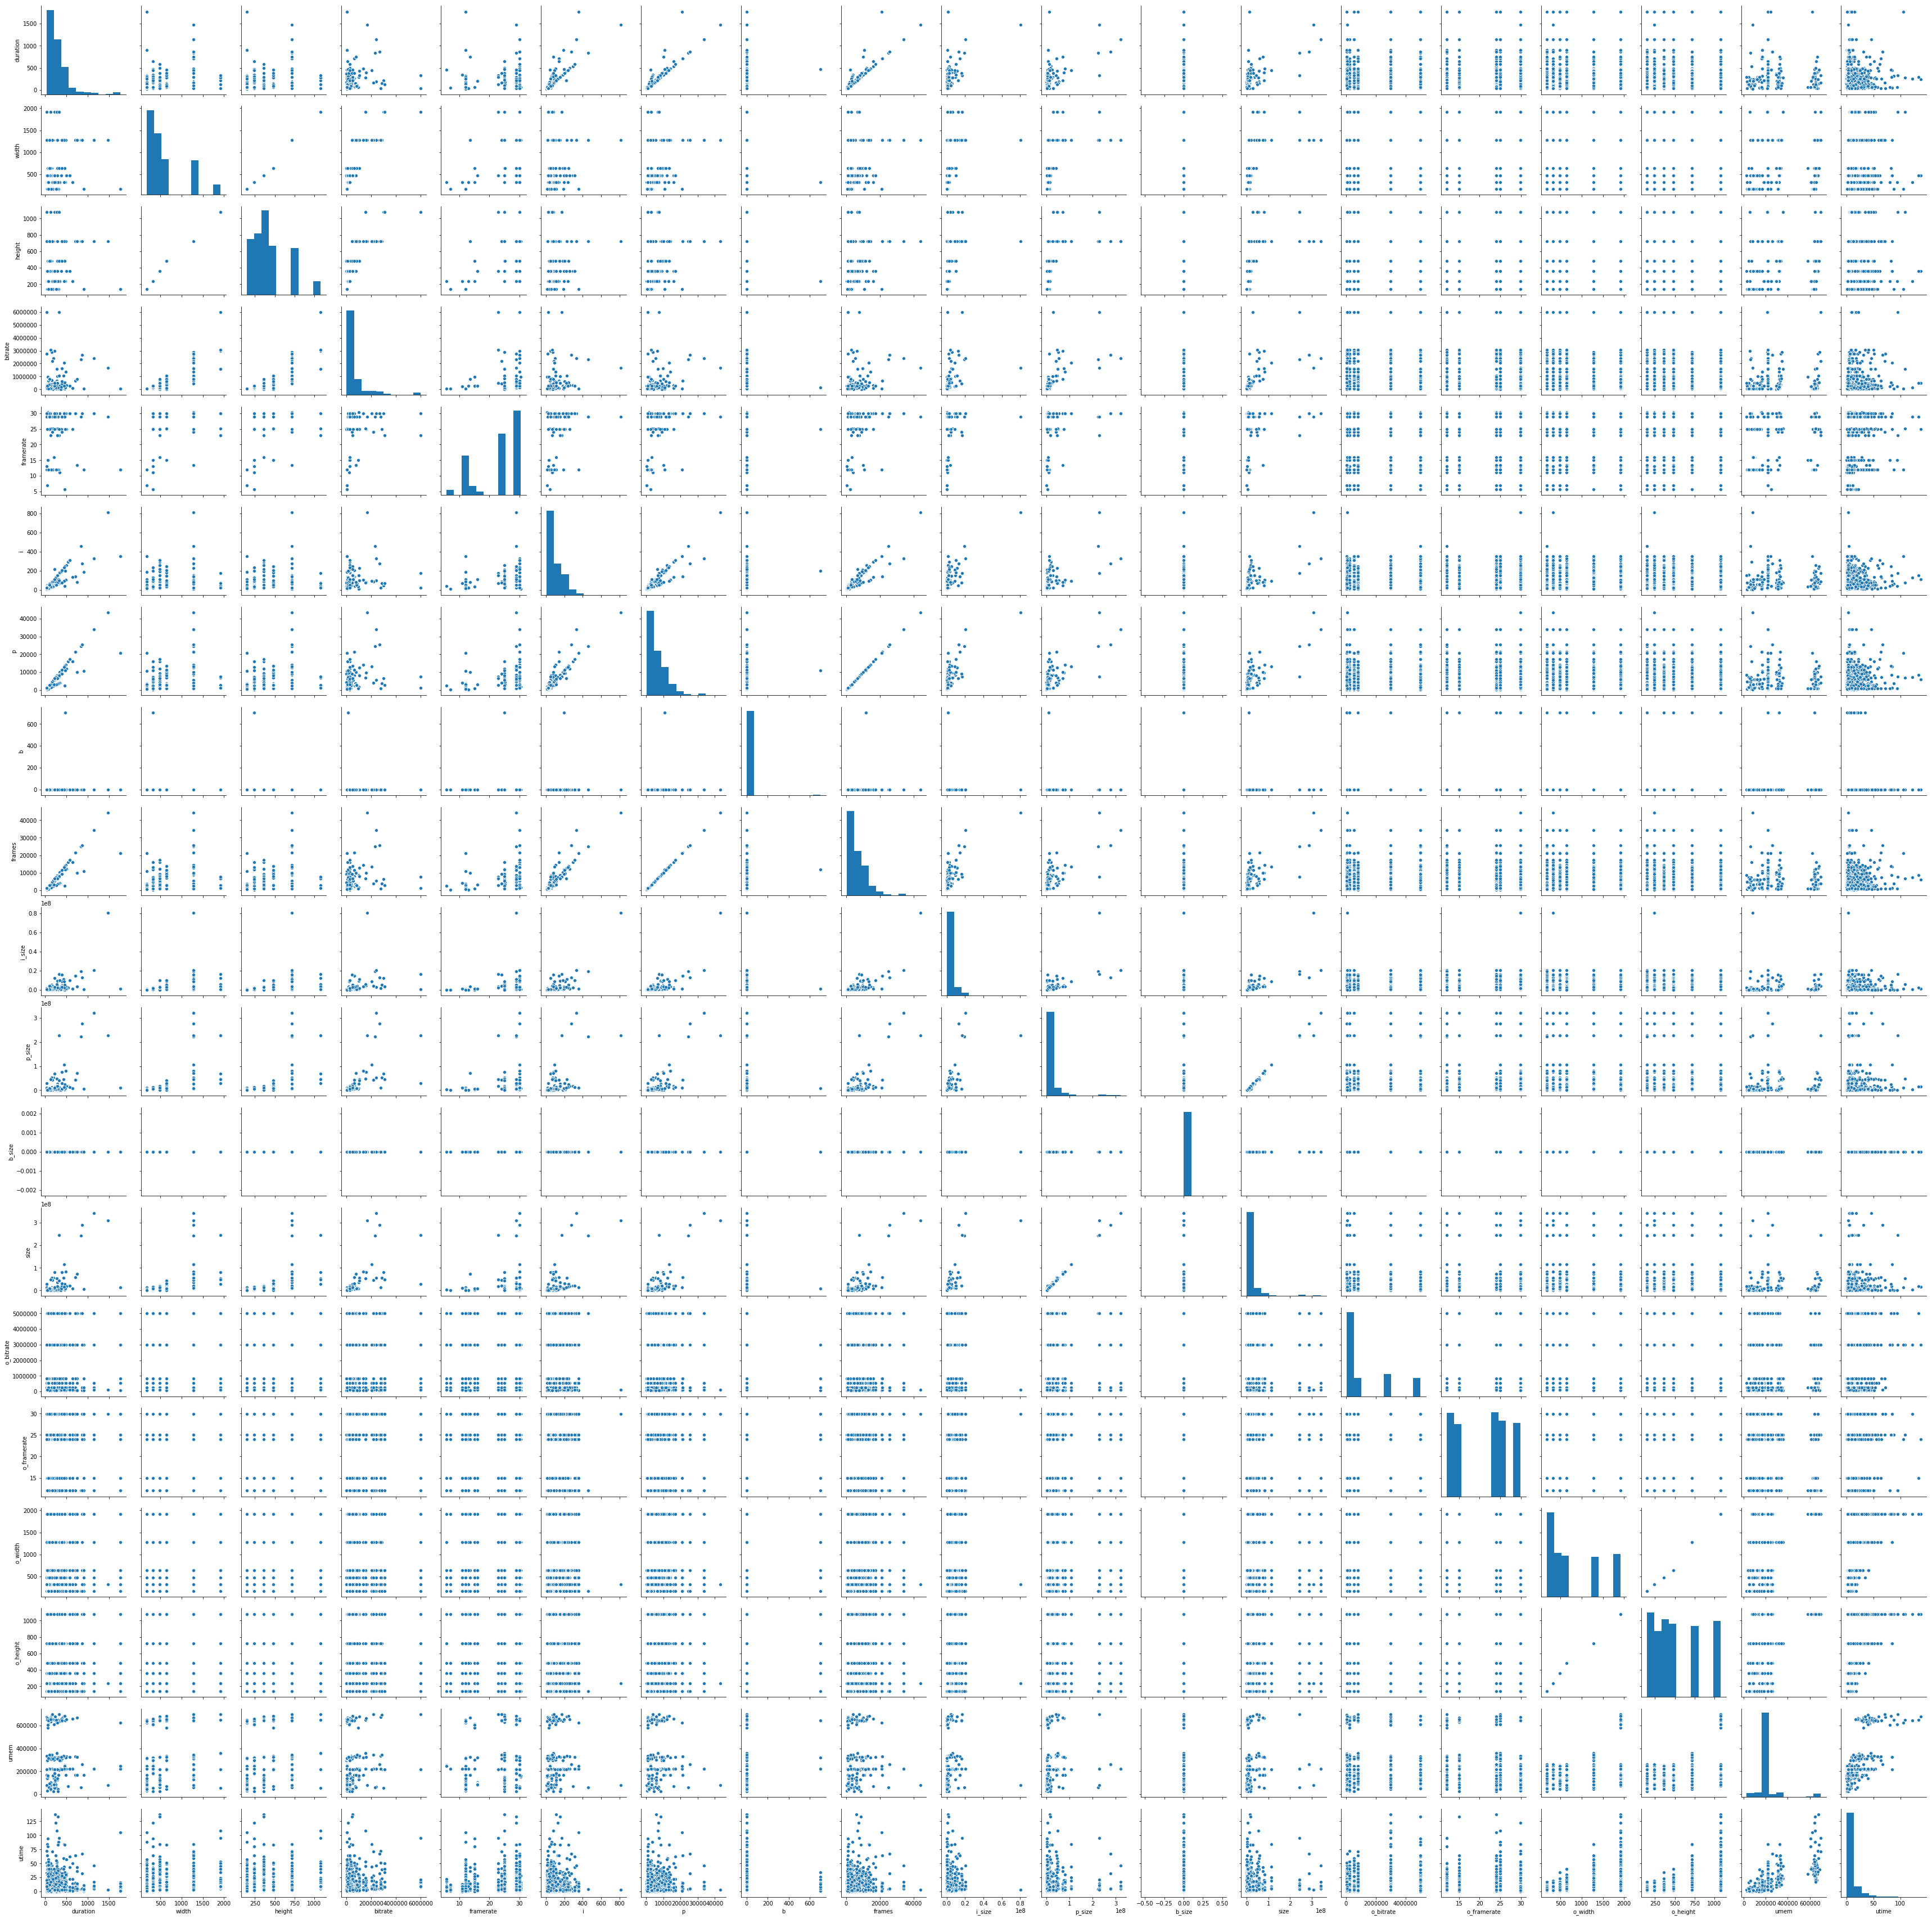

In [12]:
%matplotlib inline
# we are only taking 2% of our dataset 
# feel free to take smaller one if your system is slow/fast
dfsmall = df.sample(int(len(df)*0.02))
sns.pairplot(dfsmall)

In [13]:
# as we talked above lets do this dummy thing
codec = pd.get_dummies(df.codec, prefix = 'codec')
o_codec = pd.get_dummies(df.o_codec, prefix = 'o_codec')
df.drop(columns = ['codec','o_codec'],inplace = True)

In [14]:
codec.head()

,codec_flv,codec_h264,codec_mpeg4,codec_vp8
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [15]:
o_codec.head()

,o_codec_flv,o_codec_h264,o_codec_mpeg4,o_codec_vp8
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


## SEEMS THEY ARE SAME LETS CHECK

In [16]:
codec.values == o_codec.values
# nO THEY ARE not

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       ...,
       [False,  True,  True, False],
       [ True, False, False,  True],
       [ True, False, False,  True]])

In [17]:
"""
Our Label is utime lets separate it
"""
print(df.columns)
label = df.pop('utime')
print(df.columns)

Index(['duration', 'width', 'height', 'bitrate', 'framerate', 'i', 'p', 'b',
       'frames', 'i_size', 'p_size', 'b_size', 'size', 'o_bitrate',
       'o_framerate', 'o_width', 'o_height', 'umem', 'utime'],
      dtype='object')
Index(['duration', 'width', 'height', 'bitrate', 'framerate', 'i', 'p', 'b',
       'frames', 'i_size', 'p_size', 'b_size', 'size', 'o_bitrate',
       'o_framerate', 'o_width', 'o_height', 'umem'],
      dtype='object')


In [18]:
"""
HERE WE ARE STANDARDIZING OUR DATASET
WE DON'T WANT TO DO ANYTHING WITH CATEGORICAL ONES
SO WE WILL PROCEED STANDARDIZATION WITHOUT THEM 
AND LATER CONCATENATE THE STANDARDADIZED DATA
"""

import numpy as np
import random

codecs = pd.concat([codec, o_codec], axis=1)

M = lambda x:np.mean(x)
S = lambda x:np.std(x)

standardize = lambda x : (x- M(x)) / S(x)

data = df.apply(standardize,0)

data.drop(columns = ['b_size'], inplace = True)
"""
we add label in label column and save our data with split of 20% - 20%- 60% for testing validation training
for now we will split into 20-80 and later do cross validation on training data with 20% data
"""

data['label'] = label

#We need 70%
msk = np.random.rand(len(df)) < 0.8

data = pd.concat([codecs, data], axis = 1)

indx = list(data.index)
random.shuffle(indx)

data = data.iloc[indx]

train = data[msk]
test = data[~msk]

train.to_csv('video_feature_train.csv', index = None)
test.to_csv('video_feature_test.csv', index = None)

'\nExplore further for visualization and understanding datascience pipeline by yourself\n\nIf you want more plots like these but with different statistics objective \nplease visit following link\n\nor you can explore more \n\nhttps://seaborn.pydata.org/tutorial/categorical.html\n\nHowever for now we will save our data set\n\n'

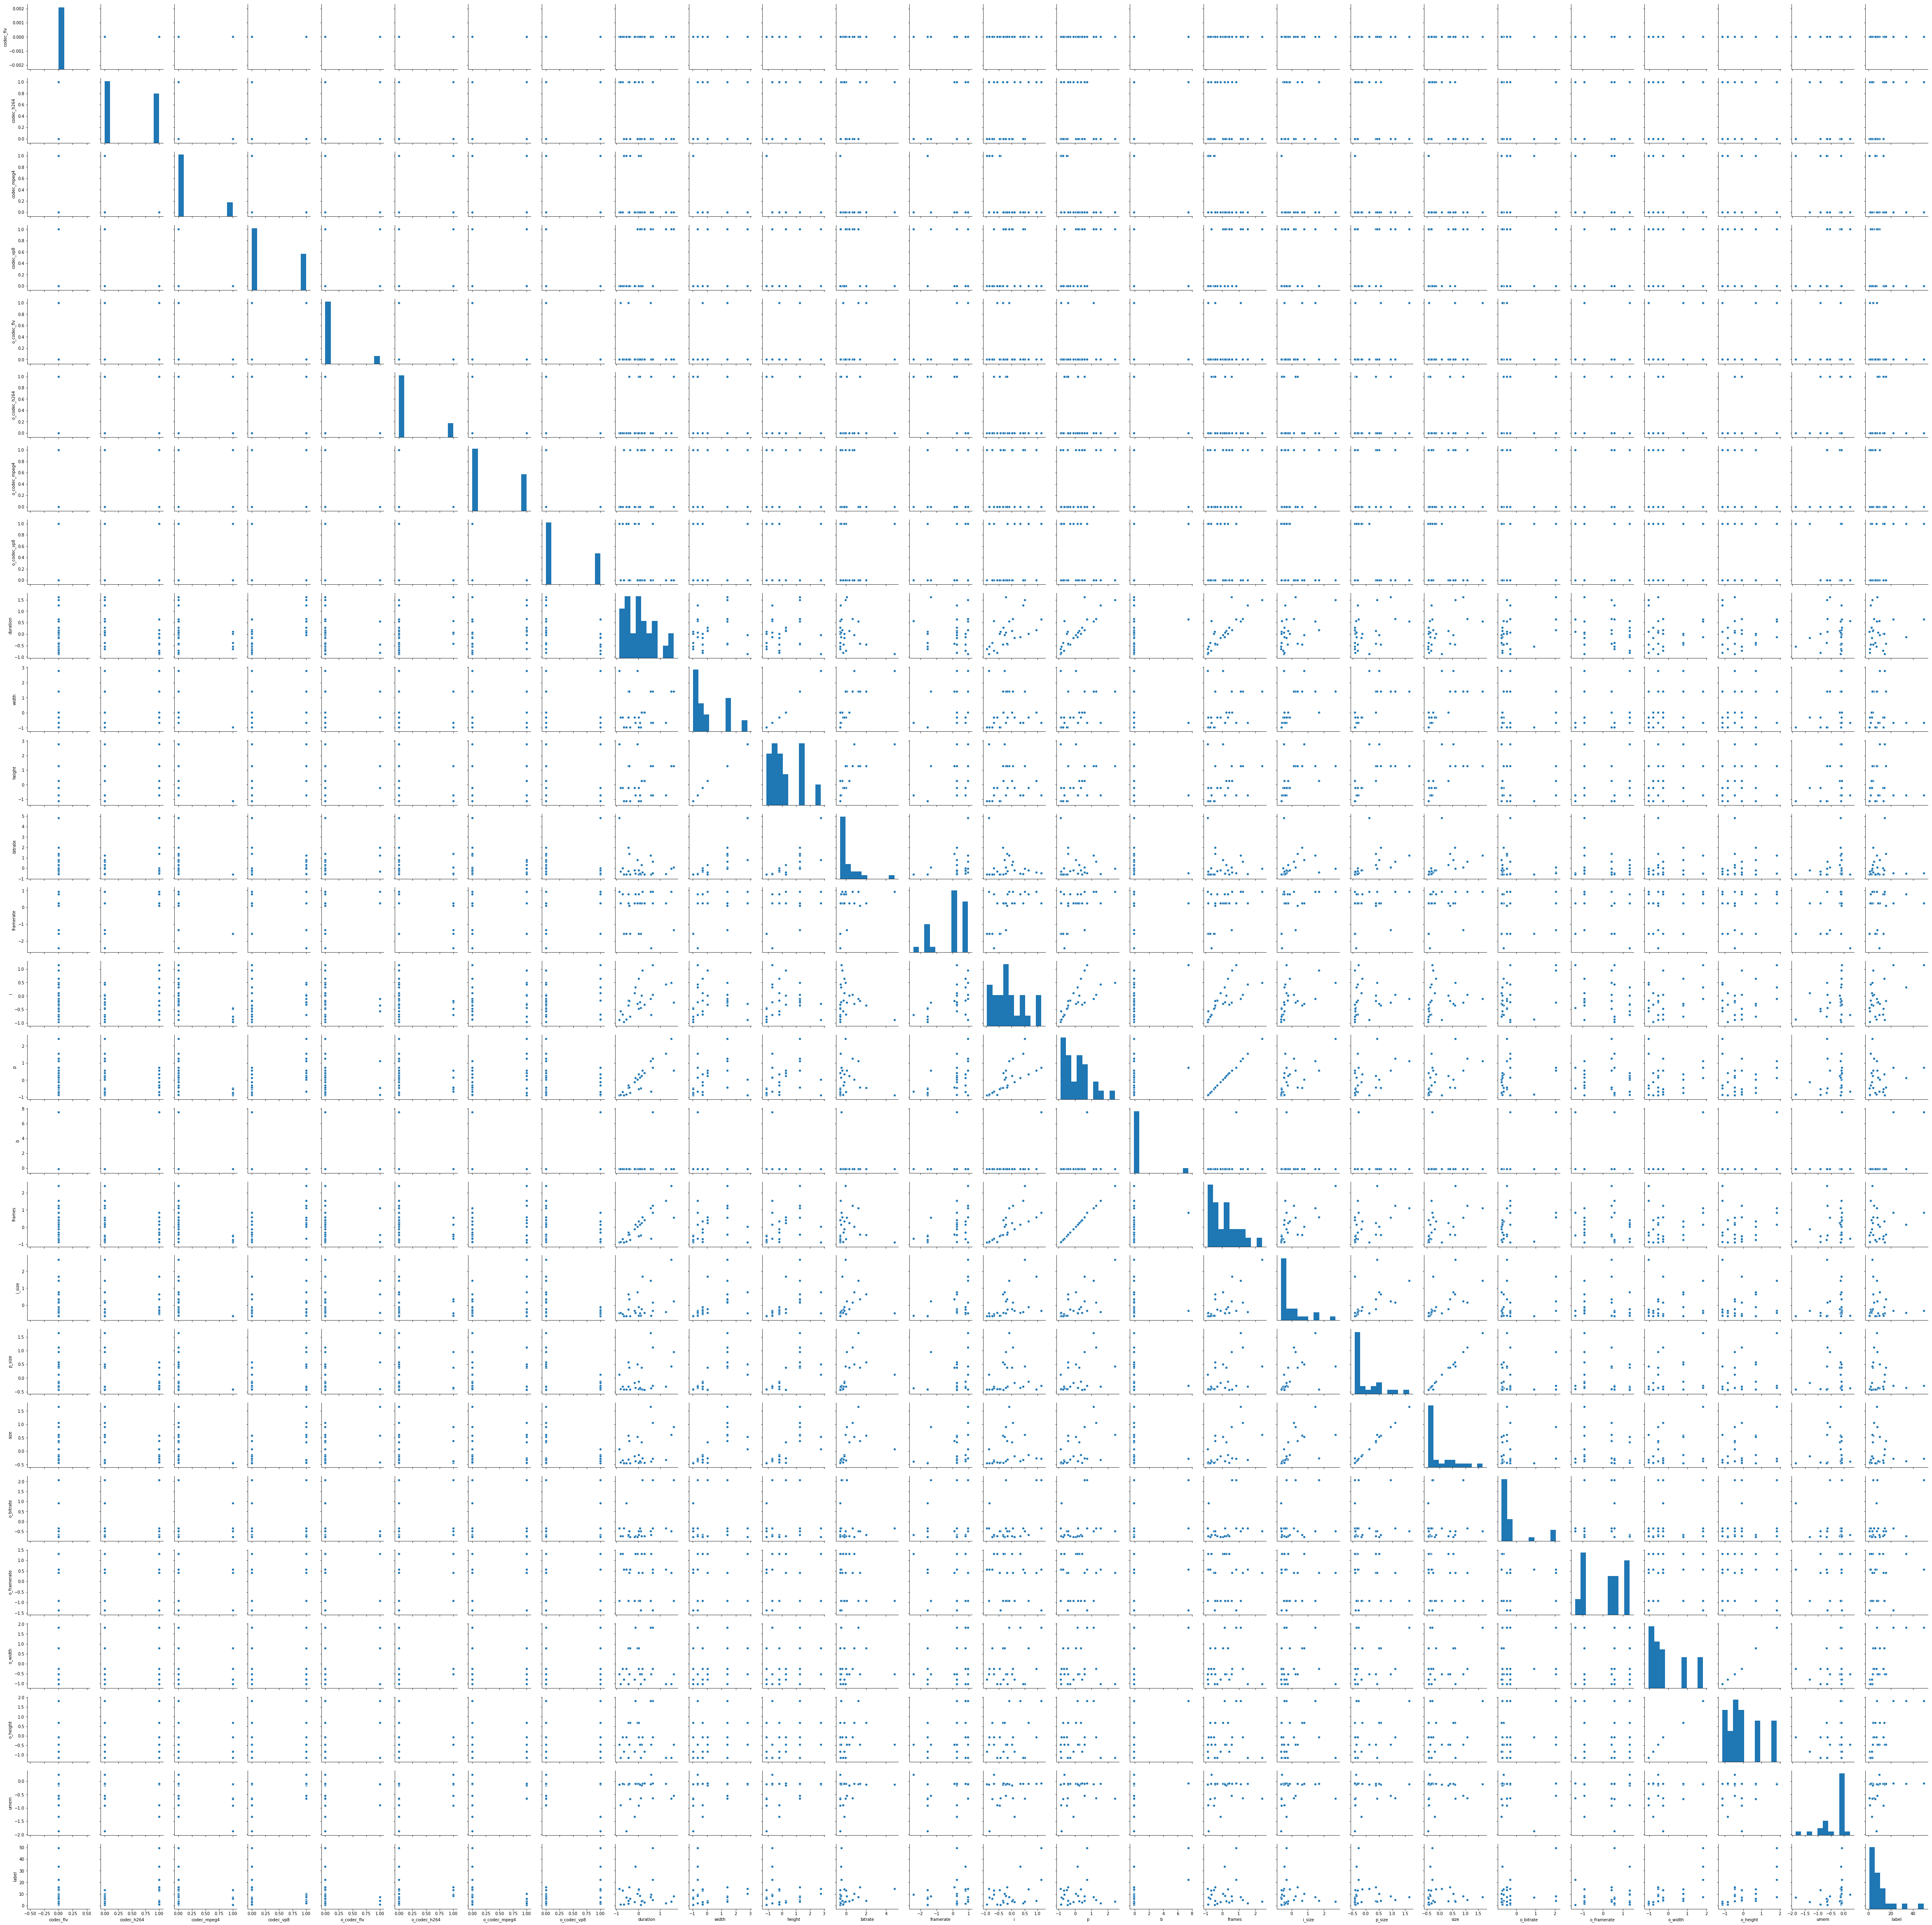

In [19]:
dfsmall = data.sample(int(len(dfsmall)*0.02))
sns.pairplot(pandas.DataFrame(dfsmall))

"""
Explore further for visualization and understanding datascience pipeline by yourself

If you want more plots like these but with different statistics objective 
please visit following link

or you can explore more 

https://seaborn.pydata.org/tutorial/categorical.html

However for now we save our data set

"""

## SECTION 2 HOUSING

In [20]:
df = pd.read_excel(realstate)

In [21]:
print(df.columns)

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')


In [22]:
df.columns = ['No','X1','X2','X3','X4','X5','X6','label']

In [23]:
df.head()

,No,X1,X2,X3,X4,X5,X6,label
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [24]:
df.drop(columns=['No'], inplace=True)
df.head()

,X1,X2,X3,X4,X5,X6,label
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [25]:
df.shape

(414, 7)

In [26]:
label = df.pop('label')
data = df.apply(standardize,0)
data['label'] = label
data.head()

,X1,X2,X3,X4,X5,X6,label
0,-0.824722,1.255628,-0.792495,2.007407,1.125430,0.448762,37.9
1,-0.824722,0.157086,-0.616612,1.667503,0.912444,0.401139,42.2
2,1.542244,-0.387791,-0.414015,0.307885,1.486860,0.688183,47.3
3,1.246373,-0.387791,-0.414015,0.307885,1.486860,0.688183,54.8
4,-1.120593,-1.117223,-0.549997,0.307885,0.834188,0.592937,43.1


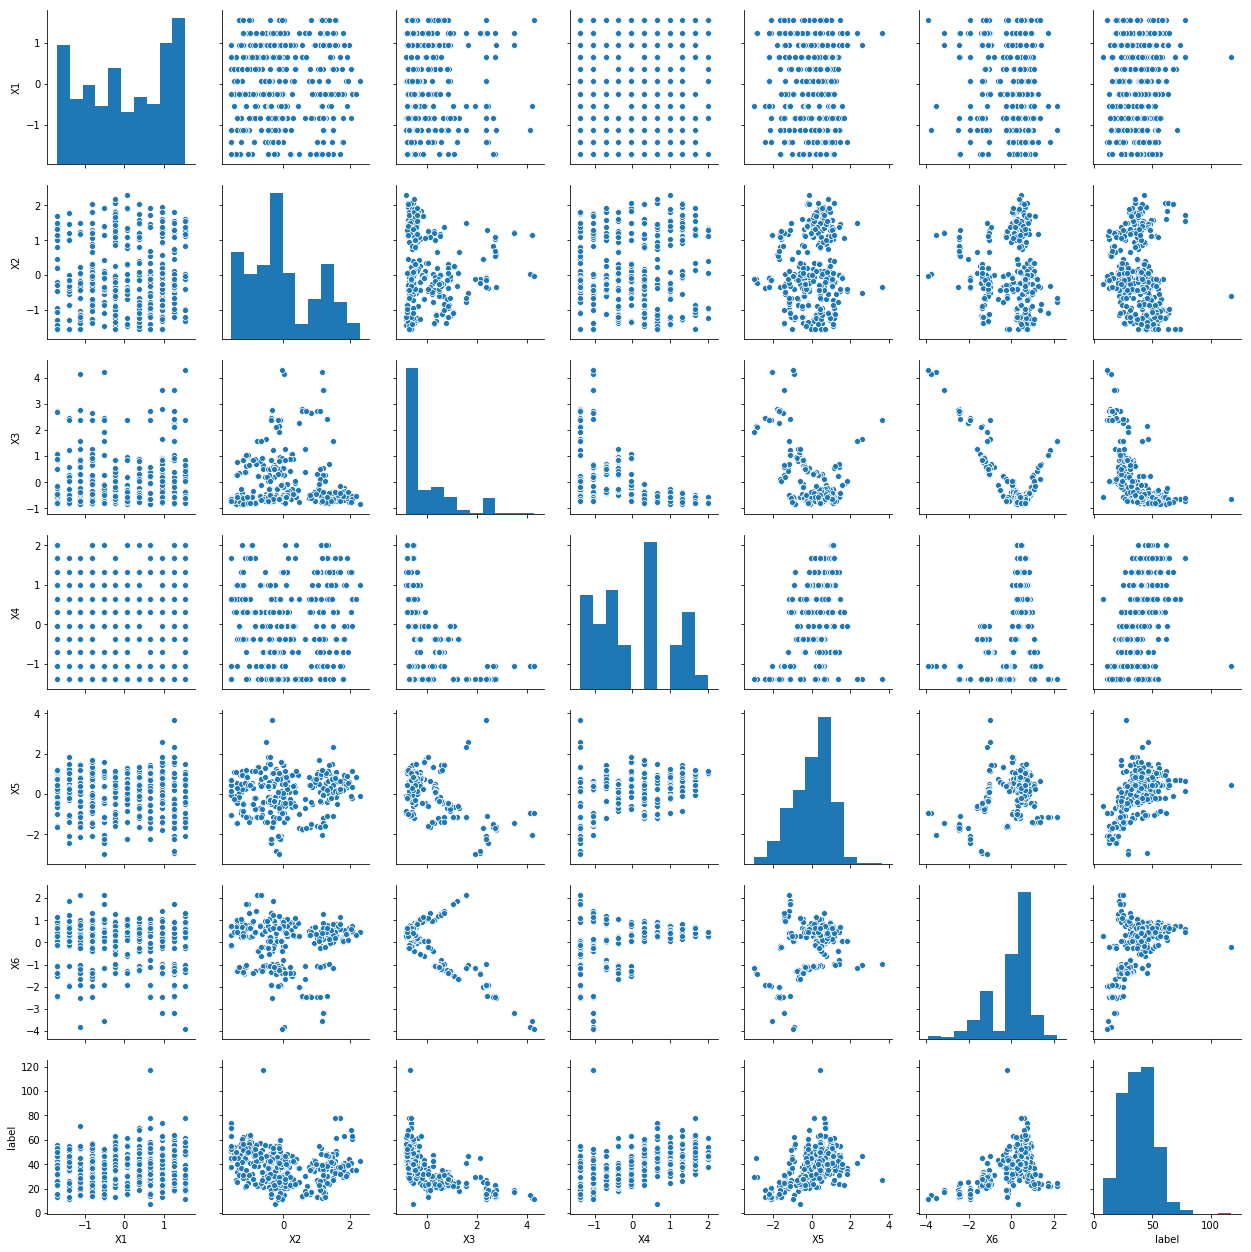

In [27]:
dfsmall = pandas.DataFrame(data.values, columns = data.columns )
sns.pairplot(pandas.DataFrame(dfsmall))

In [28]:

msk = np.random.randn(len(data)) < 0.8

indx = list(data.index)
random.shuffle(indx)

data = data.iloc[indx]

train = data[msk]
test = data[~msk]

train.to_csv('real_state_train.csv',index = None)
test.to_csv('real_state_test.csv',index = None)

In [29]:
train.head()

,X1,X2,X3,X4,X5,X6,label
108,0.950503,1.202898,-0.389807,-0.711829,0.288009,0.146713,34.1
85,-1.416463,-1.556639,-0.590931,1.667503,-0.040344,0.702536,50.8
410,-1.712334,-1.064493,-0.788071,1.667503,0.427579,0.635341,50.0
315,-0.232980,-0.185659,0.533503,-0.711829,1.143179,-0.994288,27.3
41,1.246373,-0.080199,2.366126,-1.391638,-2.102433,-1.953278,18.2


In [30]:
test.head()

,X1,X2,X3,X4,X5,X6,label
20,0.950503,-1.161164,0.945586,-0.371925,-0.475190,-1.425508,29.3
285,0.062891,1.088650,-0.290018,-0.371925,0.488893,0.200860,55.3
308,0.950503,-0.115352,-0.630312,0.307885,1.048787,0.660131,53.0
284,-0.824722,-0.238389,-0.555778,0.987694,-0.135542,0.735807,34.4
402,-1.120593,-0.440521,-0.711101,-1.051734,0.391275,-0.231664,28.5


In [31]:
train.shape

(323, 7)

In [32]:
test.shape

(91, 7)